In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing the libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the file
fire = pd.read_csv('forestfires.csv')
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
#EDA
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
## Since there are many columns we use PCA

In [8]:
df1=fire.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df1)

df_norm = sc.transform(df1)
df_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [9]:
from sklearn.decomposition import PCA  

pca = PCA(n_components = 28)      #since there are many columns we use pca
pca_values =pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  4.98037274e-16, -2.73530281e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -9.55928328e-15,  1.15055466e-15],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  2.58690766e-15, -5.66797432e-17],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -1.84247930e-16,  2.36645381e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -2.30354869e-16,  2.72058887e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  5.70142521e-17,  8.50237385e-17]])

In [10]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 1.95971390e-33])

In [11]:
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

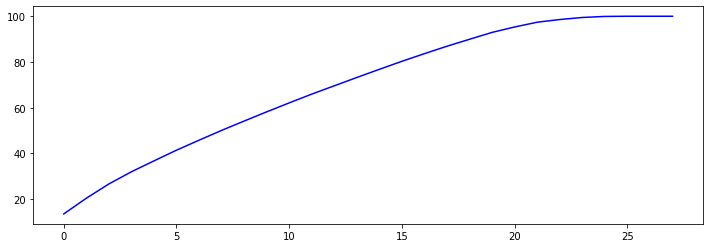

In [12]:
plt.figure(figsize=(12,4))
plt.plot(var1, color='blue');

In [13]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24], columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     fire[['size_category']]], axis =1)

finalDf.size_category.replace(('large', 'small'),(1,0), inplace=True)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [14]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Iteration-1

In [15]:
#create the model
model = Sequential()
model.add(Dense(12, input_dim=24, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 9ms/step - loss: 0.6049 - accuracy: 0.7424 - val_loss: 0.7345 - val_accuracy: 0.6859
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7535 - val_loss: 0.7328 - val_accuracy: 0.6731
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7535 - val_loss: 0.7352 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7562 - val_loss: 0.7365 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.7562 - val_loss: 0.7375 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7562 - val_loss: 0.7376 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7562 - val_loss: 0.7396 - val_accuracy: 0.6731
Epoch 8/150
3

Epoch 59/150
37/37 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9058 - val_loss: 0.8722 - val_accuracy: 0.7308
Epoch 60/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9058 - val_loss: 0.8723 - val_accuracy: 0.7308
Epoch 61/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9114 - val_loss: 0.8787 - val_accuracy: 0.7308
Epoch 62/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9141 - val_loss: 0.8835 - val_accuracy: 0.7308
Epoch 63/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.9169 - val_loss: 0.8852 - val_accuracy: 0.7308
Epoch 64/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9114 - val_loss: 0.8881 - val_accuracy: 0.7308
Epoch 65/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9141 - val_loss: 0.8932 - val_accuracy: 0.7115
Epoch 

37/37 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9751 - val_loss: 1.1356 - val_accuracy: 0.8333
Epoch 117/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9751 - val_loss: 1.1419 - val_accuracy: 0.8333
Epoch 118/150
37/37 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9806 - val_loss: 1.1594 - val_accuracy: 0.8269
Epoch 119/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9834 - val_loss: 1.1694 - val_accuracy: 0.8269
Epoch 120/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9723 - val_loss: 1.1764 - val_accuracy: 0.8269
Epoch 121/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9778 - val_loss: 1.1880 - val_accuracy: 0.8333
Epoch 122/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0845 - accuracy: 0.9806 - val_loss: 1.1938 - val_accuracy: 0.8333
Epoch 123/150

In [18]:
#evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.9458
accuracy: 94.58%


# Iteration-2

In [19]:
#create the model
model = Sequential()
model.add(Dense(12, input_dim=24, activation = 'sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='relu'))

In [20]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
#Fit the model
model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.5770 - accuracy: 0.7562 - val_loss: 0.6579 - val_accuracy: 0.6731
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7562 - val_loss: 0.6517 - val_accuracy: 0.6731
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7562 - val_loss: 0.6453 - val_accuracy: 0.6731
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7562 - val_loss: 0.6570 - val_accuracy: 0.6731
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7562 - val_loss: 0.6582 - val_accuracy: 0.6731
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7562 - val_loss: 0.6476 - val_accuracy: 0.6731
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7562 - val_loss: 0.6376 - val_accuracy: 0.6731
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8199 - val_loss: 0.9360 - val_accuracy: 0.7692
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8338 - val_loss: 0.9339 - val_accuracy: 0.7821
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8227 - val_loss: 0.9343 - val_accuracy: 0.7564
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8227 - val_loss: 0.9297 - val_accuracy: 0.7628
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8227 - val_loss: 0.9257 - val_accuracy: 0.7821
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8255 - val_loss: 0.9228 - val_accuracy: 0.7692
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8227 - val_loss: 0.9217 - val_accuracy: 0.7821
Epoch 

In [22]:
#evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8607
accuracy: 86.07%


# Iteration-3

In [23]:
#create the model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))

In [24]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
#Fit the model
model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.3808 - accuracy: 0.5845 - val_loss: 1.5022 - val_accuracy: 0.4936
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8818 - accuracy: 0.6981 - val_loss: 0.9649 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.7175 - val_loss: 0.7979 - val_accuracy: 0.5192
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.7424 - val_loss: 0.7760 - val_accuracy: 0.5192
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.7452 - val_loss: 0.7576 - val_accuracy: 0.5385
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.7590 - val_loss: 0.7466 - val_accuracy: 0.5833
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.7645 - val_loss: 0.7384 - val_accuracy: 0.5641
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8393 - val_loss: 1.1564 - val_accuracy: 0.6474
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8366 - val_loss: 1.1576 - val_accuracy: 0.6474
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8366 - val_loss: 1.1547 - val_accuracy: 0.6474
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8449 - val_loss: 1.1686 - val_accuracy: 0.6410
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8476 - val_loss: 1.2010 - val_accuracy: 0.6474
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8504 - val_loss: 1.1728 - val_accuracy: 0.6474
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8532 - val_loss: 1.2417 - val_accuracy: 0.6474
Epoch 

In [26]:
#Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 1.0041 - accuracy: 0.8395
accuracy: 83.95%


# Iteration-4

In [27]:
#create the model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))

In [28]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 8ms/step - loss: 3.4377 - accuracy: 0.7535 - val_loss: 4.0382 - val_accuracy: 0.6603
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 3.3893 - accuracy: 0.7507 - val_loss: 3.9694 - val_accuracy: 0.6538
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 3.3855 - accuracy: 0.7535 - val_loss: 4.0197 - val_accuracy: 0.6538
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 3.3800 - accuracy: 0.7562 - val_loss: 4.0983 - val_accuracy: 0.6603
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 3.3767 - accuracy: 0.7562 - val_loss: 4.1003 - val_accuracy: 0.6603
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 3.3742 - accuracy: 0.7562 - val_loss: 4.1074 - val_accuracy: 0.6603
Epoch 7/150
37/37 [==============================] - 0s 4ms/step - loss: 3.3741 - accuracy: 0.7562 - val_loss: 4.1059 - val_accuracy: 0.6603
Epoch 8/150
3

Epoch 59/150
37/37 [==============================] - 0s 2ms/step - loss: 1.3568 - accuracy: 0.8033 - val_loss: 1.6338 - val_accuracy: 0.6795
Epoch 60/150
37/37 [==============================] - 0s 3ms/step - loss: 1.3540 - accuracy: 0.8061 - val_loss: 1.6343 - val_accuracy: 0.6795
Epoch 61/150
37/37 [==============================] - 0s 3ms/step - loss: 1.3519 - accuracy: 0.8089 - val_loss: 1.6334 - val_accuracy: 0.6859
Epoch 62/150
37/37 [==============================] - 0s 2ms/step - loss: 1.3488 - accuracy: 0.8116 - val_loss: 1.6365 - val_accuracy: 0.6859
Epoch 63/150
37/37 [==============================] - 0s 4ms/step - loss: 1.3454 - accuracy: 0.8089 - val_loss: 1.6443 - val_accuracy: 0.6923
Epoch 64/150
37/37 [==============================] - 0s 2ms/step - loss: 1.3427 - accuracy: 0.8116 - val_loss: 1.7065 - val_accuracy: 0.6923
Epoch 65/150
37/37 [==============================] - 0s 2ms/step - loss: 1.3410 - accuracy: 0.8089 - val_loss: 1.7071 - val_accuracy: 0.6923
Epoch 

37/37 [==============================] - 0s 3ms/step - loss: 0.9959 - accuracy: 0.8615 - val_loss: 1.5071 - val_accuracy: 0.7692
Epoch 117/150
37/37 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.8670 - val_loss: 1.4436 - val_accuracy: 0.7692
Epoch 118/150
37/37 [==============================] - 0s 2ms/step - loss: 0.9945 - accuracy: 0.8670 - val_loss: 1.5093 - val_accuracy: 0.7692
Epoch 119/150
37/37 [==============================] - 0s 2ms/step - loss: 0.9891 - accuracy: 0.8726 - val_loss: 1.5145 - val_accuracy: 0.7628
Epoch 120/150
37/37 [==============================] - 0s 2ms/step - loss: 0.9906 - accuracy: 0.8698 - val_loss: 1.5117 - val_accuracy: 0.7756
Epoch 121/150
37/37 [==============================] - 0s 3ms/step - loss: 0.9866 - accuracy: 0.8670 - val_loss: 1.5128 - val_accuracy: 0.7628
Epoch 122/150
37/37 [==============================] - 0s 3ms/step - loss: 0.9859 - accuracy: 0.8670 - val_loss: 1.5115 - val_accuracy: 0.7692
Epoch 123/150

In [30]:
#Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 1.1986 - accuracy: 0.8607
accuracy: 86.07%


# Out of all iterations ,we are getting best accuracy with iteration-1,  94.58% .

# Hence we can consider those combinations